In [1]:
import requests
import re
import matplotlib.pyplot as mpl

In [2]:
stop_mots = [
    "a", "an", "and", "are", "as", "at", "be", "by", "for", "from", "has", "he", "in", "is", "it", "its",
    "of", "on", "that", "the", "to", "was", "were", "will", "with", "about", "above", "after", "again",
    "against", "all", "am", "any", "because", "been", "before", "being", "below", "between", "both",
    "but", "can", "did", "do", "does", "doing", "down", "during", "each", "few", "had", "have",
    "having", "her", "here", "hers", "herself", "him", "himself", "his", "how", "i", "if", "into",
    "just", "me", "more", "most", "my", "myself", "no", "nor", "not", "now", "off", "once", "only",
    "or", "other", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "should", "so",
    "some", "such", "than", "their", "theirs", "them", "themselves", "then", "there", "these",
    "they", "this", "those", "through", "too", "under", "until", "up", "very", "we", "what", "when",
    "where", "which", "while", "who", "whom", "why", "you", "your", "yours", "yourself", "yourselves"
]

In [3]:
def get_content(article_name):
    url = f"https://en.wikipedia.org/w/api.php?action=query&prop=revisions&titles={article_name}&rvslots=main&rvprop=content&format=json&origin=*"
    headers = {
        "User-Agent": "MyPythonApp/1.0 (https://example.com/)"
    }
    resp = requests.get(url ,headers=headers)
    return resp.json()
#print(get_content("ozone_layer"))
data = get_content("ozone_layer")

In [4]:
def merge_contents(json):
    cont = list(json["query"]["pages"].values())[0]["revisions"][0]["slots"]["main"]["*"]
    cont = cont.split("==See also==")[0]
    cont = re.sub(r"<[^>]+>.*?</[^>]+>|<[^>]+/>", "", cont, flags=re.DOTALL)
    cont = re.sub(r"==", "", cont, flags=re.DOTALL)
    cont = re.sub(r"{{.*?}}", "", cont, flags=re.DOTALL)
    cont = re.sub(r"\[\[File:[^\]]*(?:\[\[[^\]]*\]\][^\]]*)*\]\]", "", cont, flags=re.DOTALL)
    cont = cont.replace("[", "").replace("]", "").replace("|", "")
    return cont
#print(merge_contents(get_content("ozone_layer")))
merge_content = merge_contents(data)

In [5]:
def tokenize(content):
    return re.findall(r"[A-Za-z]+(?:'[A-Za-z]+)?", content)
#print(tokenize(merge_contents(get_content("ozone_layer"))))
collection = tokenize(merge_content)

In [6]:
def lower_collection(collection):
    lower_coll = []
    for mot in collection :
        lower_coll.append(mot.lower())
    return lower_coll
#lower_collection(collection)
lower_tab = lower_collection(collection)

In [7]:
def count_frequency(collection):
    frequency = {}
    for mot in collection :
        if mot in frequency :
            frequency[mot] += 1
        else :
            frequency[mot] = 1
    return frequency
#print(count_frequency(lower_tab))
frequency = count_frequency(lower_tab)

In [8]:
def print_most_frequent(frequencies, n):
    frequencies_tab = list(frequencies.items())
    frequencies_tab.sort(key = lambda t: t[1], reverse=True)
    return frequencies_tab[0 : n]
#print(print_most_frequent(frequency,10))
Top_10 = print_most_frequent(frequency,20)

<BarContainer object of 20 artists>

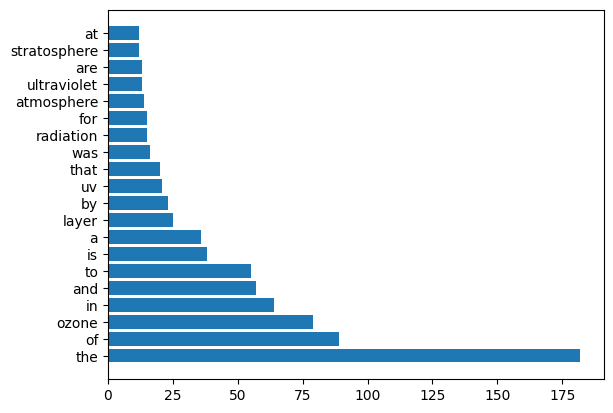

In [9]:
X = list(map(lambda t: t[1], Top_10))
Y = list(map(lambda t: t[0], Top_10))

mpl.barh(Y, X)

In [10]:
def remove_stop_words(words, stop_motwords):
    data_sans_stop_words = []
    for mot in words :
        if mot not in stop_motwords :
            data_sans_stop_words.append(mot)
    return data_sans_stop_words
Top_10_clean = print_most_frequent(count_frequency(remove_stop_words(lower_tab, stop_mots)),20)
#filtered_collection = remove_stop_words(lower_tab, stop_mots)

<BarContainer object of 20 artists>

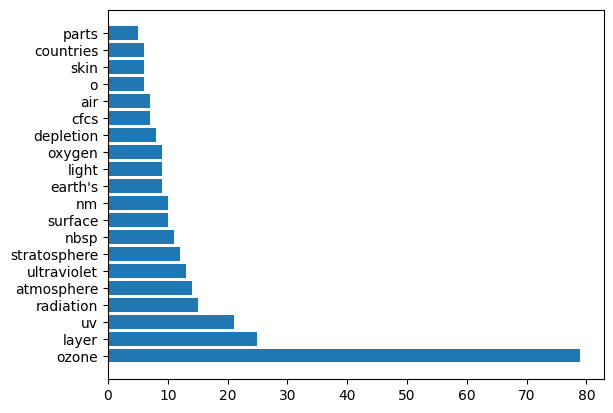

In [11]:
X = list(map(lambda t: t[1], Top_10_clean))
Y = list(map(lambda t: t[0], Top_10_clean))

mpl.barh(Y, X)